# Guided Project: Investigating Fandango Movie Ratings

In this project, I'll analyse more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Walt Hickey's 2015 [analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/).

The two datasets that I'll be using for this investigation are as follows:
- Walt Hickey's [dataset](https://github.com/fivethirtyeight/data/tree/master/fandango) for ratings up to 2015.
- Dataquest's [dataset](https://github.com/mircealex/Movie_ratings_2016_17) for ratings in 2016 and 2017.

## Understanding the Data

In [1]:
# Importing the above datasets
import pandas as pd
pre2015 = pd.read_csv("fandango_score_comparison.csv")
post2015 = pd.read_csv("movie_ratings_16_17.csv")

# Isolating relevant columns
pre2015_isolated = pre2015[['FILM', 'Fandango_Stars',
                            'Fandango_Ratingvalue', 'Fandango_votes',
                            'Fandango_Difference']]
post2015_isolated = post2015[['movie', 'year', 'fandango']]

# Checking isolated datasets
pre2015_isolated.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [2]:
post2015_isolated.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


For the goal of this investigation, the population of interest includes all the Fandango movie ratings, as I will be comparing the ratings from before Hickey's analysis, to the ratings after his analysis.

By reading the README.md files of the two repositories, I can see the following:
- fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

- movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

We can see that data for 2016 and 2017 is based on the most popular movies, so it does not factor in less popular films. Hickey's dataset includes films with at least 30 fan reviews, so it may include films not in the other dataset. These data sets are not random.

## Changing the Goal of our Analysis

Due to the data available not being randomly sampled, I will slightly alter the goal of the analysis. I will change the population of interest to analysing popular movies ratings, as these kinds of movies would be covered by both data sets.

## Isolating the Samples We Need

In [3]:
# Checking if pre-2015 contain popular movies
pre2015_isolated.sort_values(by=['Fandango_votes']).head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
39,Maps to the Stars (2015),3.5,3.1,35,0.4
122,Tangerine (2015),4.0,3.9,36,0.1
43,The Diary of a Teenage Girl (2015),4.0,3.6,38,0.4
71,The Wrecking Crew (2015),4.5,4.2,38,0.3
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [4]:
# Checking if post-2015 contain popular movies
post2015_isolated.sample(10, random_state = 2)

,movie,year,fandango
23,Bitter Harvest,2017,4.5
155,Table 19,2017,3.0
207,Whiskey Tango Foxtrot,2016,3.5
13,Arsenal,2017,3.5
64,Gold,2016,3.5
131,Pele: Birth of a Legened,2016,4.5
141,Sausage Party,2016,3.5
193,The Secret Life of Pets,2016,4.0
93,Kung Fu Panda 3,2016,4.5
30,Cafe Society,2016,3.5


Checking on Rotten Tomatoes the number of ratings for the above films:

| Movie | Year | Ratings |
| --- | --- | --- |
| Bitter Harvest | 2017 | 1000+ |
| Table 19 | 2017 | 5000+ |
| Whiskey Tango Foxtrot | 2016 | 10000+ |
| Arsenal | 2017 | 250+ |
| Gold | 2016 | 5000+ |
| Pele: Birth of a Legened | 2016 | 1000+ |
| Sausage Party | 2016 | 50000+ |
| The Secret Life of Pets | 2016 | 50000+ |
| Kung Fu Panda 3 | 2016 | 100000+ |
| Cafe Society | 2016 | 10000+ |

From this random sample, all of them have had over 30 ratings on rotten tomatoes. Therefore I am confident that the dataset contains enough popular films.

In [5]:
# Isolating movies released in 2015
pre2015_isolated['Year'] = pre2015_isolated['FILM'].str[-5:-1]
pre2015_isolated.head(2)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [6]:
fandango_2015 = pre2015_isolated[pre2015_isolated['Year'] == '2015'].copy()
fandango_2016 = post2015_isolated[post2015_isolated['year'] == 2016].copy()

## Comparing Distribution Shapes for 2015 and 2016

In [7]:
# Importing matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

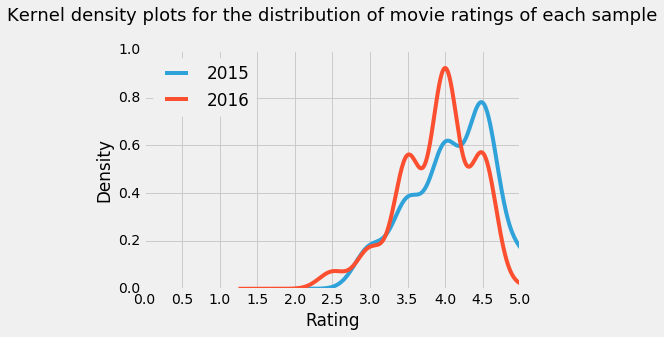

In [8]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.legend(loc='upper left')
plt.title("Kernel density plots for the distribution of movie ratings of each sample",
          fontsize = 18, y=1.1)
plt.xlabel("Rating")
plt.ylabel("Density")
plt.xlim([0, 5])
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

The shape of the distribution is left skewed for both 2015 and 2016 samples.
The shapes are similar, although their are slight differences:
- The 2015 dataset peaks slightly after 2016 (around 4.1 compared to 4.0).
- 2015 has a steady almost linear increase to the peak, then a steady. decline. Meanwhile, 2016 has a peak around 3.5, dips slightly before rising to its 4.0 peak, then declines before increasing again from a density of around 0.5 to almost 0.6, before declining.
- 2016's density peak is higher than 2015 (roughly 0.9 compared to 0.78).

From the above data, I can see that there is evidence that there is a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. Movies in 2015 were generally rated higher than in 2016.

## Comparing Relative Frequencies

In [9]:
# Examining the frequency distribution tables of the two distributions
fandango_2015['Fandango_Stars'].value_counts(normalize = True)*100 # Normalize and *100 turns it into a percentage

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [10]:
fandango_2016['fandango'].value_counts(normalize = True)*100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

From looking at the frequency distribution tables, it is clear that there is a difference between the two distribution.
- 2015 ratings had a majority of 4.5 star ratings (38%) while 2016 only had 24% of ratings as 4.5.
- It is still clear that the ratings are strongly left skewed, irregardless of the year.

## Determining the Direction of the Change

In [11]:
# Computing the mean, median, and mode for each distribution
print("2015 mean: ",fandango_2015['Fandango_Stars'].mean())
print("2015 median: ",fandango_2015['Fandango_Stars'].median())
print("2015 mode: ",fandango_2015['Fandango_Stars'].mode())
print("2016 mean: ",fandango_2016['fandango'].mean())
print("2016 median: ",fandango_2016['fandango'].median())
print("2016 mode: ",fandango_2016['fandango'].mode())

2015 mean:  4.0852713178294575
2015 median:  4.0
2015 mode:  0    4.5
dtype: float64
2016 mean:  3.887434554973822
2016 median:  4.0
2016 mode:  0    4.0
dtype: float64


In [12]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

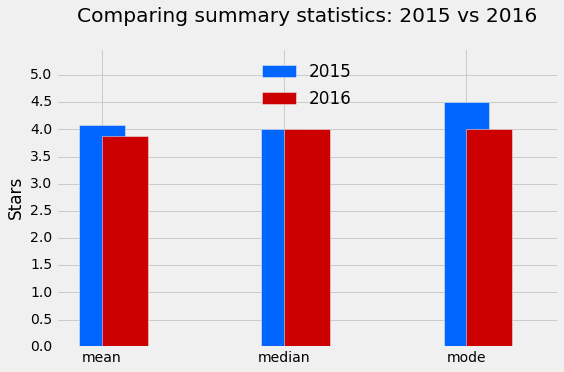

In [13]:
# Generating a grouped bar plot
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

From the above analysis, I have showed that there's a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. I have also determined that on average popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.